In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
# Load the dataset
url = "https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataset
print(df.head())

   CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
0    15634602  Hargrave          619    France  Female   42       2   
1    15647311      Hill          608     Spain  Female   41       1   
2    15619304      Onio          502    France  Female   42       8   
3    15701354      Boni          699    France  Female   39       1   
4    15737888  Mitchell          850     Spain  Female   43       2   

     Balance  Num Of Products  Has Credit Card  Is Active Member  \
0       0.00                1                1                 1   
1   83807.86                1                0                 1   
2  159660.80                3                1                 0   
3       0.00                2                0                 0   
4  125510.82                1                1                 1   

   Estimated Salary  Churn  
0         101348.88      1  
1         112542.58      0  
2         113931.57      1  
3          93826.63      0  
4          79084.10

In [9]:
print(df.isnull().sum())

CustomerId          0
Surname             0
CreditScore         0
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
Num Of Products     0
Has Credit Card     0
Is Active Member    0
Estimated Salary    0
Churn               0
dtype: int64


In [10]:
label_encoder = LabelEncoder()
df['Geography'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])


In [13]:
df = df.drop(columns=[ 'CustomerId', 'Surname'])

In [17]:
X = df.drop('Churn', axis=1)
y = df['Churn']


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [20]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [21]:
y_pred = model.predict(X_test)

# Print accuracy and classification report
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Accuracy: 0.8166666666666667
              precision    recall  f1-score   support

           0       0.83      0.97      0.90      2416
           1       0.60      0.17      0.27       584

    accuracy                           0.82      3000
   macro avg       0.72      0.57      0.58      3000
weighted avg       0.79      0.82      0.77      3000



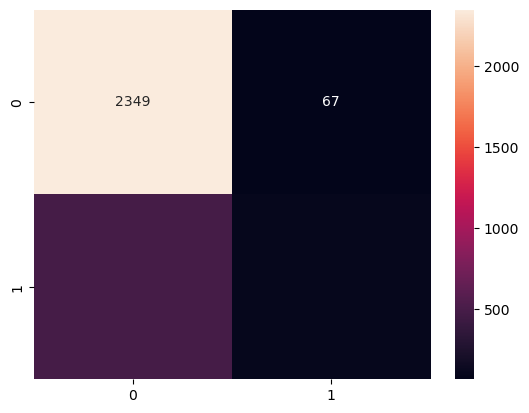

In [22]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()
